In [ ]:
%load_ext autoreload
%autoreload 2

In [32]:
# Public modules
import os
import wfdb
import importlib
import numpy as np

# Custom modules
import preprocessing_utils

In [ ]:
# Explicit reloading of modules
importlib.reload(preprocessing_utils)

In [104]:
test_file_path = "data_original/mitdb/111"
test_file_name = test_file_path.split("/")[-1]
test_database = test_file_path.rsplit("/", 2)[-2]

In [123]:
record = wfdb.rdrecord(test_file_path, sampfrom=2000, sampto=3000)
annotations = wfdb.rdann(test_file_path, "atr", shift_samps=True, sampfrom=2000, sampto=3000)

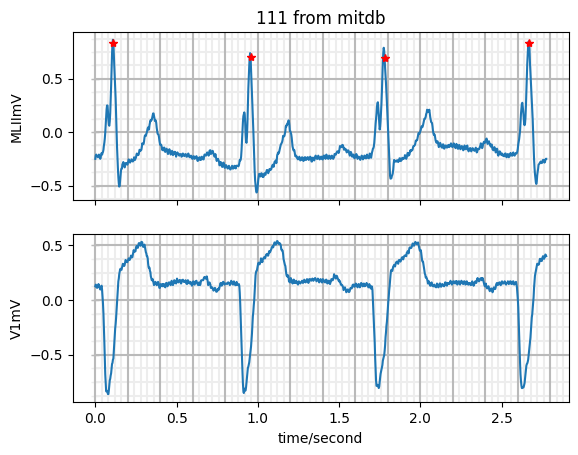

In [125]:
wfdb.plot_wfdb(record, title=test_file_name + " from " + test_database, ecg_grids='all', annotation=annotations)

In [ ]:
record.__dict__

In [ ]:
wfdb.show_ann_labels()

In [113]:
fmt = record.fmt
fs_target = 200

In [114]:
resampled_signal, resampled_annotations = preprocessing_utils.resample_record_and_annotations(record, annotations, fs_target)
signal, annotations = preprocessing_utils.normalize_signal_and_center(resampled_signal), resampled_annotations

signal = preprocessing_utils.remove_noise_convolution(signal)
#signal = preprocessing_utils.cutoff_freqs_fir_filter(signal)
signal = preprocessing_utils.remove_baseline_wander_wavelets(signal)

In [115]:
test_target_path = "data_processed/"

In [116]:
wfdb.wrsamp(record_name=test_file_name + "_processed", fs=fs_target, units=record.units,
            sig_name=['ECG CH1', 'ECG CH2'], p_signal=signal, fmt=fmt,
            write_dir=test_target_path)

wfdb.wrann(test_file_name + "_processed", extension='atr', sample=annotations.sample,
           symbol=annotations.symbol, fs=fs_target,
           write_dir=test_target_path)

In [117]:
test_processed_path = "data_processed/111_processed"

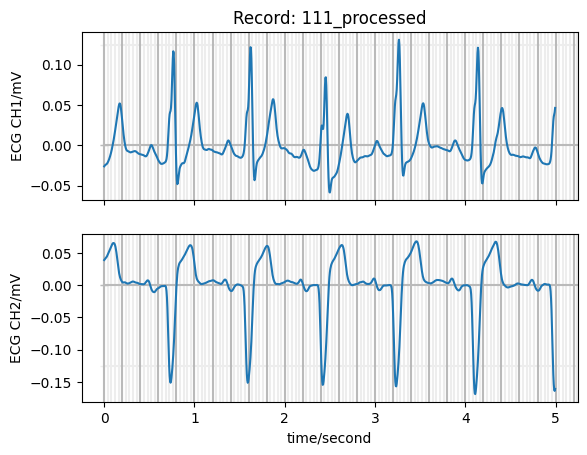

In [118]:
tested_record = wfdb.rdrecord(test_processed_path, sampfrom=2000, sampto=3000)
tested_annotations = wfdb.rdann(test_processed_path, "atr")
wfdb.plot_wfdb(tested_record, ecg_grids='all')